In [1]:
from typing import List
from IPython import display

### 743. Medium

- Network Delay Time
You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.


In [2]:
"""
Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
Output: 2

Input: times = [[1,2,1]], n = 2, k = 2
Output: -1
"""

class Solution:
    def networkDelayTime(self, times: List[List[int]], N: int, K: int) -> int:

        g = collections.defaultdict(list)
        for u, v, cost in times:
            g[u].append((cost, v))

        # cost,node
        min_heap = [(0, K)]
        visited = set()
        distance = {i: float('inf') for i in range(1, N+1)}
        distance[K] = 0

        while min_heap:
            cur_dist, u = heapq.heappop(min_heap)
            if u in visited:
                continue
            visited.add(u)
            if len(visited) == N:
                return cur_dist

            for direct_distance, v in g[u]:
                if cur_dist + direct_distance < distance[v] and v not in visited:
                    distance[v] = cur_dist + direct_distance
                    heapq.heappush(min_heap, (cur_dist + direct_distance, v))
        return -1

In [3]:
# BETTER SOLUTION
class Solution:
    import heapq
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        adj = collections.defaultdict(list)
        for i,j,dist in times:
            adj[i].append((j, dist))
        INF = 10**4
        dist = [INF for _ in range(n+1)]
        seen = set()
        dist[k] = 0
        heap = [(0,k)]
        while heap:
            curWeight, u = heapq.heappop(heap)
            if u in seen:
                continue
            seen.add(u)
            for v, cost in adj[u]:
                if dist[u] + cost < dist[v]:
                    dist[v] = dist[u] + cost
                    heapq.heappush(heap, (dist[v], v))
        dist.pop(0)
        print(dist)
        return max(dist) if max(dist) != INF else -1

## 76. Hard

- Minimum Window Substring

Given two strings s and t of lengths m and n respectively, return the minimum window substring of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

- The testcases will be generated such that the answer is unique.

- A substring is a contiguous sequence of characters within the string.

In [4]:
"""
Input: s = "ADOBECODEBANC", t = "ABC"
Output: "BANC"
Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' 
from string t.
"""
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        len1, len2 = len(s), len(t)
          
        if(len1 < len2):
            return ""

        hashPat = {}
        hashStr = {}
        
        for i in range(0, len2):
            if(hashPat.get(t[i]) is None):
                hashPat[t[i]] = 0
            hashPat[t[i]] += 1

        count = left = 0
        startIndex = -1
        minLen = float("inf")

        for right in range(0, len1):

            if(hashStr.get(s[right]) is None):
                hashStr[s[right]] = 0
            hashStr[s[right]] += 1
            if(hashPat.get(s[right]) is None):
                hashPat[s[right]] = 0
            if (

                hashPat.get(s[right]) != 0 and
                hashStr.get(s[right]) <= hashPat.get(s[right])
            ):
                count += 1  # keep incrementing the count if string hash is less then pattern hash
            # count==len2 means a window is found that contains all character of pattern string
            if (count == len2):

                if(hashStr.get(s[left]) is None):
                    hashStr[s[right]] = 0
                if(hashPat.get(s[left]) is None):
                    hashPat[s[right]] = 0
                while (
                    hashStr.get(s[left]) > hashPat.get(s[left]) or
                    hashPat.get(s[left]) == 0
                ):
                    #minimizing the windows range from left side

                    if (hashStr.get(s[left]) > hashPat.get(s[left])):
                        hashStr[s[left]] -= 1
                    left += 1  # incrementing the left pointer

                windowLen = right - left + 1  # calculating the windows length
                if (minLen > windowLen):
                    minLen = windowLen
                    startIndex = left

        if (startIndex == -1):
            return ""
        return s[startIndex:startIndex+minLen]

In [5]:
#BETTER SOLUTION
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        map = {}
        for char in t:
            if char in map:
                map[char] += 1
            else:
                map[char] = 1
        
        n = len(s) - 1
        count = len(map)
        ans = ''
        i, j = 0, 0
        c = ""
        min = inf
        while j <= n:
            if s[j] in map:
                map[s[j]] -= 1
                if map[s[j]] == 0:
                    count -= 1
            while count == 0:
                if j-i+1 < min:
                    min=j-i+1
                    c=s[i:j+1]
                if s[i] in map:
                    map[s[i]] += 1
                    if map[s[i]] > 0:
                        count += 1
                i += 1
            j += 1
        
        return c

## 62. Unique Paths

- Medium

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

- Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

- The test cases are generated so that the answer will be less than or equal to 2 * 109.

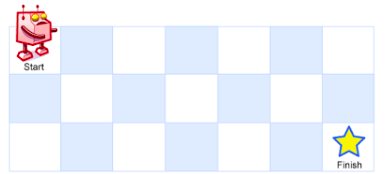

In [6]:
display.Image("Robot.png")

In [7]:
"""
Input: m = 3, n = 7
Output: 28
~~~~~~~~~~~~~~~~
Input: m = 3, n = 2
Output: 3
Explanation: From the top-left corner,
there are a total of 3 ways to reach the bottom-right corner:
1. Right -> Down -> Down
2. Down -> Down -> Right
3. Down -> Right -> Down
"""

class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        
        dp = [[0 for x in range(m)] for y in range(n)]
        for i in range(m):
            dp[0][i] = 1
        
        for i in range(n):
            dp[i][0] = 1
        
        for i in range(1, n):
            for j in range(1, m):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        
        return(dp[-1][-1])

In [8]:
# Better

class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        d = [[1 for col in range(n)] for row in range(m)]
        
        for row in range(1, m):
            for col in range(1, n):
                d[row][col] = d[row-1][col] + d[row][col-1]
        
        return d[m-1][n-1]
        

## 121. Best Time to Buy and Sell Stock

- Easy

You are given an array prices where prices[i] is the price of a given stock on the ith day.

- You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

In [9]:
"""
Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), 
profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy 
before you sell.
"""

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        buyPrice, profit = float("inf"), 0

        for i, price in enumerate(prices):
            if(buyPrice > price):
                buyPrice = price
            else:
                profit = max(profit, price-buyPrice)

        return profit

In [10]:
#Better
def maxProfit(prices):
    buy, profit = float('inf'), 0
    for p in prices:
        buy, profit = min(buy, p), max(profit, p-buy)
    return profit

You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

- Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

In [11]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        if amount <= 0:
            return 0
        
        if min(coins) > amount:
            return -1

        INT_MAX = 1<<32
        dp = [INT_MAX] * (amount +1)
        
        dp[0] = 0
        
        for i in range(1, amount + 1):
            for coin in coins:
                if coin <= i:
                    dp[i] = min((dp[i-coin] + 1), dp[i])
                    
        return dp[amount] if dp[amount] != INT_MAX else -1

Given the head of a linked list, remove the nth node from the end of the list and return its head.

In [12]:
"""
1 -> 2-> 3-> [4]->5
1 -> 2-> 3------->5

"""

class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        ans = ListNode(0)
        ans.next = head

        first, second = ans, ans

        for i in range(1,n+2):
            first = first.next
        
        while (first is not None):
            first = first.next
            second = second.next

        second.next = second.next.next

        return ans.next

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

- Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

In [13]:
"""
case1
Input: nums = [1,2,3,1]
Output: 4
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.

case2
Input: nums = [2,7,9,3,1]
Output: 12
Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
Total amount you can rob = 2 + 9 + 1 = 12.

"""
class Solution:
    
    def rob(self, nums: List[int]) -> int:
        n = len(nums)
        if(n==0):
            return 0
        
        dp = [0] * n
        dp[0] = nums[0]

        for i in range(1,n):
            if(i==1):
                dp[i] = max(nums[0],nums[1])
            else:
                dp[i] = max(dp[i-1], dp[i-2]+nums[i])
            
        return dp[-1]



In [14]:
#Another approach

class Solution:
    def rob(self, nums: List[int]) -> int:
        #Constant space use two variables and compute the max respectively
        prev = curr = 0
        for num in nums:
            temp = prev # This represents the nums[i-2]th value
            prev = curr # This represents the nums[i-1]th value
            curr = max(num + temp, prev) # Here we just plug into the formula
        return curr

The only key idea we have to understand is that we want to store previous values (very much similar to if we were swapping two variables)


Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

- According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”



In [15]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if(root is None):
            return None
        if(root.val==p.val or root.val==q.val):
            return root
        
        left = self.lowestCommonAncestor(root.left,p,q)
        right = self.lowestCommonAncestor(root.right,p,q)

        if(left is None and right is None):
            return None
        if(left is not None and right is not None):
            return root
        if(left is None):
            return right
        return left

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

In [16]:
class Solution:
    def trap(self, height: List[int]) -> int:
        n = len(height)
        if(n == 0):
            return 0

        left = [0]*n
        right = [0] * n

        ans = 0

        left[0] = height[0]

        for i in range(1, n):
            left[i] = max(left[i-1], height[i])

        right[n-1] = height[n-1]

        for i in range(n-2, -1, -1):
            right[i] = max(right[i+1], height[i])

        for i in range(0, n):
            ans += min(left[i], right[i])-height[i]

        return ans

- Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]
- Output: 6
- Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.

In [17]:
"""

Given i < j, if left_max_i <= right_max_j: vol_i = left_max_i - bar_i, otherwise, 
vol_j = right_max_j - bar_j
because, if left_max_i <= right_max_j: left_max_i <= right_max_j <= right_max_j-1 <= 
... <= right_max_i,
then min(left_max_i, right_max_i) is always left_max_i

"""

def trap(self, bars):
    if not bars or len(bars) < 3:
        return 0
    volume = 0
    left, right = 0, len(bars) - 1
    l_max, r_max = bars[left], bars[right]
    while left < right:
        l_max, r_max = max(bars[left], l_max), max(bars[right], r_max)
        if l_max <= r_max:
            volume += l_max - bars[left]
            left += 1
        else:
            volume += r_max - bars[right]
            right -= 1
    return volume

majority element

Given an array nums of size n, return the majority element.

- The majority element is the element that appears more than ⌊n / 2⌋ times. You may assume that the majority element always exists in the array.



In [18]:
"""
Example 1:

Input: nums = [3,2,3]
Output: 3
Example 2:

Input: nums = [2,2,1,1,1,2,2]
Output: 2
"""

class Solution:
    def majorityElement(self, nums: List[int]) -> int:
        m = {}
        for num in nums:
            m[num] = m.get(num,0)+1
        for num in nums:
            if(m[num]>len(nums)//2):
                return num
        

- Hard

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any non-empty path.

In [19]:
"""
    1
2      3

Input: root = [1,2,3]
Output: 6
Explanation: The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.
"""
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    ans = -float("inf")
    def solution(self,node):
        if(node is None):
            return 0
        left = self.solution(node.left)
        right = self.solution(node.right)

        mxSide = max(node.val,max(left,right)+node.val)
        mxTop = max(mxSide,left+right+node.val)
        self.ans = max(self.ans,mxTop)
        return mxSide

    def maxPathSum(self, root: TreeNode) -> int:
        self.solution(root)
        return self.ans

## 141. Easy
Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

In [20]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

In [21]:
"""
Input: head = [3,2,0,-4], pos = 1
Output: true
Explanation: There is a cycle in the linked list,
where the tail connects to the 1st node (0-indexed).
"""
class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        hare = turtle = head

        while turtle and hare and hare.next:
            hare = hare.next.next
            turtle = turtle.next
            if(turtle == hare):return True
        return False
    
# Complexity: time complexity is O(n), space complexity is O(1).

# 344. Easy

- Reverse String

Write a function that reverses a string. The input string is given as an array of characters s.

You must do this by modifying the input array in-place with O(1) extra memory.

In [22]:
"""
input: ["a","p","p","l","e"]
output: ["e","l","p","p","a"]
"""
class Solution:
    def reverseString(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        s[:] = s[::-1]

Similiar problem

In [23]:
"""
input: apple is good
output: good is apple
"""
def Reverse(sentence):
    result=[]
    result_sp = sentence.split()
    for i in range(len(result_sp)):
        result.append(result_sp[-i-1])
    return " ".join(result)

### 79. Medium

- Word Search

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

In [24]:
"""
Input: board = [["A","B","C","E"],
                ["S","F","C","S"],
                ["A","D","E","E"]]

word = "ABCCED"
Output: true
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
Input: board = [["A","B","C","E"],
                ["S","F","C","S"],
                ["A","D","E","E"]], 
word = "ABCB"
Output: false

"""
class Solution:
    dx = [0, 0, -1, 1]
    dy = [1, -1, 0, 0]

    def solution(self, board, word, x, y, cur):
        if(x < 0 or x >= len(board) or y < 0 or y >= len(board[x]) or board[x][y] == ' '):
            return False
        cur += board[x][y]

        if(len(cur) > len(word)):
            return False
        if(cur[len(cur)-1] != word[len(cur)-1]):
            return False
        if(cur == word):
            return True

        temp = board[x][y]
        board[x][y] = ' '

        for i in range(4):
            if(self.solution(board, word, x+self.dx[i], y+self.dy[i], cur)):
                return True

        board[x][y] = temp
        return False

    def exist(self, board: List[List[str]], word: str) -> bool:
        if(len(word) == 0):
            return True
        n = len(board)
        for i in range(n):
            m = len(board[i])
            for j in range(m):
                if(word[0] == board[i][j] and self.solution(board, word, i, j, "")):
                    return True
        return False

In [25]:
# BETTER SOLUTION
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        B = sum(board,[])
        if any(B.count(i) < word.count(i) for i in set(word)): return False
        self.rows = len(board)
        self.cols = len(board[0])
        self.board = board
        self.word = word
        self.cache = defaultdict(int)
        for row in range(self.rows):
            for col in range(self.cols):
                if board[row][col]==word[0]:
                    if self.backtrack(row,col,1):
                        return True
                    
        return False
    
    def backtrack(self,r,c,index):
        if self.cache[(r,c,index)]>=80:
            return False
        if index==len(self.word):
            return True
        
        self.board[r][c],prev="0",self.board[r][c]
        for dr,dc in [(1,0),(-1,0),(0,1),(0,-1)]:
            if r+dr<0 or r+dr>=self.rows or c+dc<0 or c+dc>=self.cols:
                continue
            if self.board[r+dr][c+dc]==self.word[index]:
                self.cache[(r,c,index)]+=1
                if self.backtrack(r+dr,c+dc,index+1):
                    return True
        self.board[r][c]=prev
        return False